## Práctico 3 

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Cargar y normalizar el conjunto de datos 

# La división de las imágenes por 255 es una técnica de preprocesamiento de datos conocida como normalización.
# Las imágenes estan compuestas por píxeles, y cada píxel tiene un valor de intensidad en la escala de grises (para imágenes en blanco y negro) o en los canales de color rojo, verde y azul. 
# Estos valores de intensidad varían de 0 a 255, donde 0 representa el negro puro y 255 el blanco puro.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas en one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

2024-06-09 02:39:40.549454: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 02:39:41.840601: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 02:39:44.106619: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 02:39:47.114115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


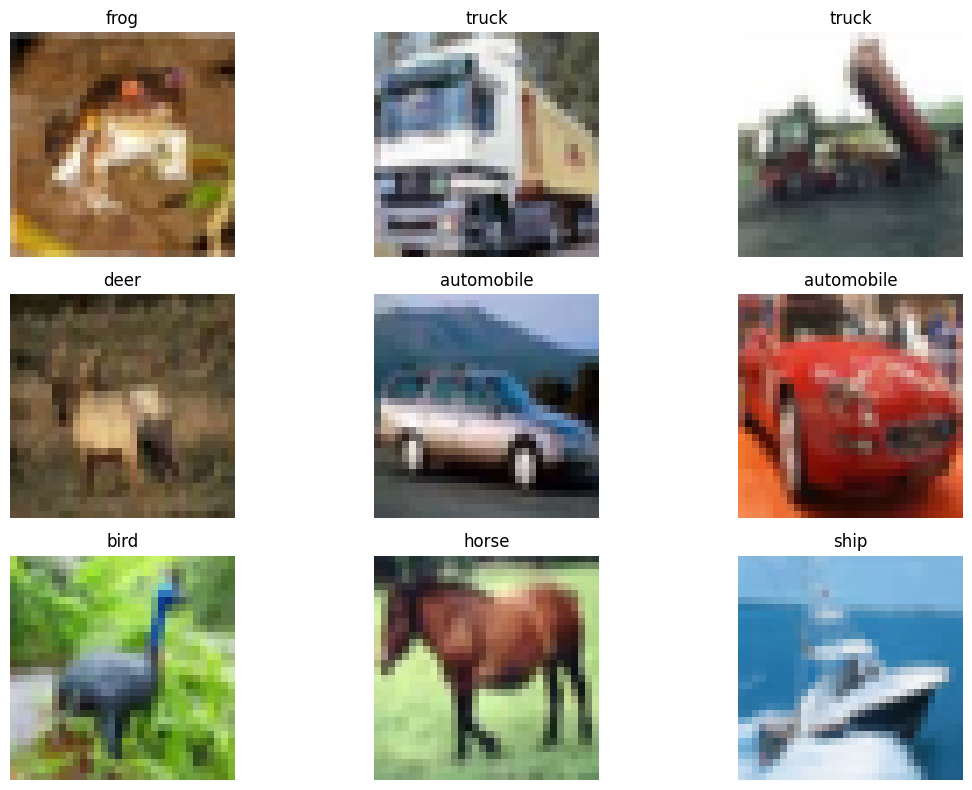

In [3]:
# Función para visualizar imágenes de muestra y sus etiquetas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(x, y):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.clip(x[i], 0, 1))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar imágenes de muestra y sus etiquetas
plot_sample_images(x_train, y_train)

# Crea los generadores de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)

In [4]:
# Define tu modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compila y entrena el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=5, validation_data=(x_test, y_test))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.3008 - loss: 2.1827

2024-06-09 02:43:02.411939: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 188s 472ms/step - accuracy: 0.3010 - loss: 2.1817 - val_accuracy: 0.2783 - val_loss: 2.3104
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 183s 466ms/step - accuracy: 0.4926 - loss: 1.4143 - val_accuracy: 0.5696 - val_loss: 1.2169
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 465ms/step - accuracy: 0.5598 - loss: 1.2392 - val_accuracy: 0.6359 - val_loss: 1.0461
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 462ms/step - accuracy: 0.5960 - loss: 1.1468 - val_accuracy: 0.6329 - val_loss: 1.0526
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 465ms/step - accuracy: 0.6311 - loss: 1.0554 - val_accuracy: 0.6323 - val_loss: 1.1026


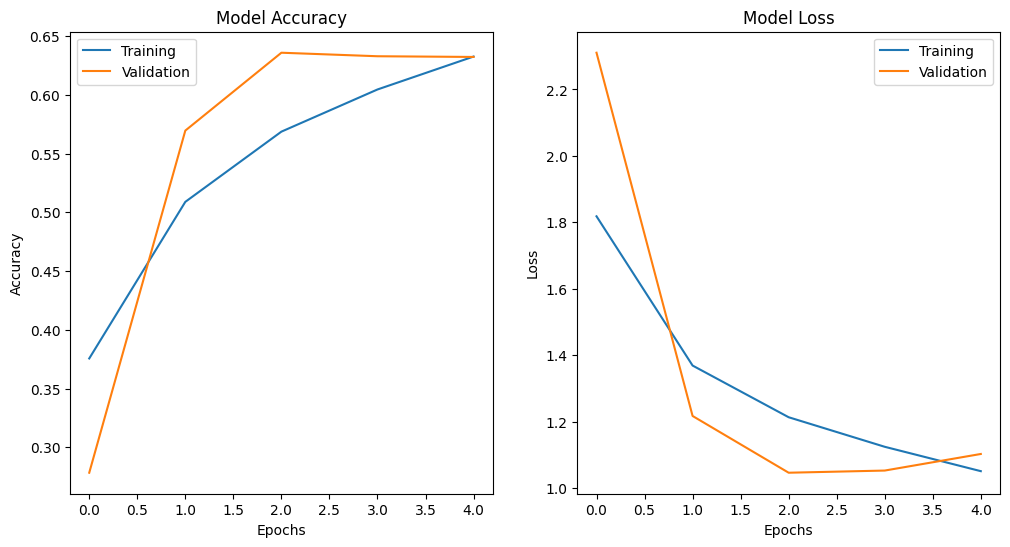

In [7]:
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model.save('conv.h5')

### SAVE ARTIFACT IN S3

In [8]:
!pip install boto3

In [9]:
import boto3

# Nombre del archivo local y del bucket de S3
local_file_name = 'conv.h5'
s3_bucket_name = 'ml-en-produccion'

# Ruta en S3 donde deseas almacenar el archivo
s3_key = 'artifacts/conv.h5'

# Crea una instancia del cliente S3
s3_client = boto3.client('s3')

# Sube el archivo a S3
s3_client.upload_file(local_file_name, s3_bucket_name, s3_key)

print(f'Archivo {local_file_name} subido exitosamente a {s3_key} en el bucket {s3_bucket_name}.')

NoCredentialsError: Unable to locate credentials